第５章　教師付き学習と教師なし学習  
5.5 教師なし学習の実験

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
%precision 3
import seaborn

最終的に推定したいパラメータの値:
 pi_1 = 0.1
 pi_2 = 0.4 
 pi_3 = 0.5

In [2]:
'''θの値は既知としている'''
th_1 = 0.8
th_2 = 0.6 
th_3 = 0.3
'''πの初期値'''
init_pi_1 = 0.3
init_pi_2 = 0.5
init_pi_3 = 0.2
'''n,rk'''
n = 10000
r1 = 4746
r2 = 5254

In [3]:
def E_step(pi): 
    margi_1 = pi[0]*th_1 + pi[1]*th_2 + pi[2]*th_3
    margi_2 = pi[0]*(1-th_1) + pi[1]*(1-th_2) + pi[2]*(1-th_3)
    return [[pi[0]*th_1/margi_1,pi[0]*(1-th_1)/margi_2], [pi[1]*th_2/margi_1, pi[1]*(1-th_2)/margi_2], [pi[2]*th_3/margi_1, pi[2]*(1-th_3)/margi_2]]

In [4]:
def M_step(p_wi_vk):
    return [(r1*p_wi_vk[0][0]+r2*p_wi_vk[0][1])/n, (r1*p_wi_vk[1][0]+r2*p_wi_vk[1][1])/n, (r1*p_wi_vk[2][0]+r2*p_wi_vk[2][1])/n]

In [5]:
#EステップとMステップを繰り返す
pi = [[init_pi_1, init_pi_2, init_pi_3]]
p_wi_vk = []
log_p_x = []
for i in range(50):
    p_wi_vk.append(E_step(pi[i]))
    pi.append(M_step(p_wi_vk[i]))
    
    #式が長くなるのでl1, l2に分けただけ
    l1 = r1*np.log(pi[i][0]*th_1+pi[i][1]*th_2+pi[i][2]*th_3)
    l2 = r2*np.log(pi[i][0]*(1-th_1)+pi[i][1]*(1-th_2)+pi[i][2]*(1-th_3))
    log_p_x.append(l1+l2)
    
    

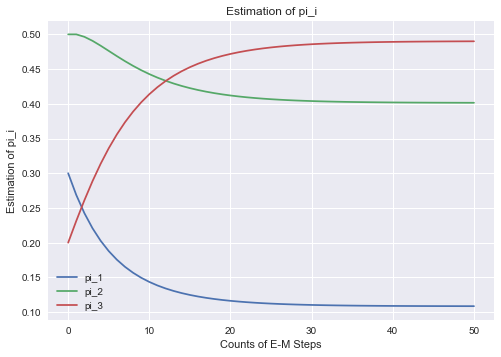

In [6]:
#図5.3　「パラメータπiの推定実験」
pi = np.array(pi)

plt.plot(pi[:,0], label='pi_1')
plt.plot(pi[:,1], label='pi_2')
plt.plot(pi[:,2], label='pi_3')
plt.xlabel('Counts of E-M Steps')
plt.ylabel('Estimation of pi_i')
plt.title('Estimation of pi_i')
plt.legend(loc='best')
plt.show()

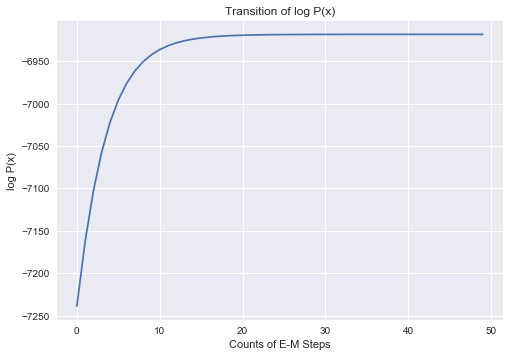

In [7]:
#図５．２「単調増加するlogP(x)」
plt.plot(log_p_x)
plt.title('Transition of log P(x)')
plt.xlabel('Counts of E-M Steps')
plt.ylabel('log P(x)')
plt.show()